In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


# Loading The Data

In [12]:
df = pd.read_csv(r"D:\iris classification\Iris.csv")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
# data stats
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [16]:
df.shape

(150, 5)

# Data Pre-Processing

In [17]:
# checking null value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Analysis

C:\Users\lalit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


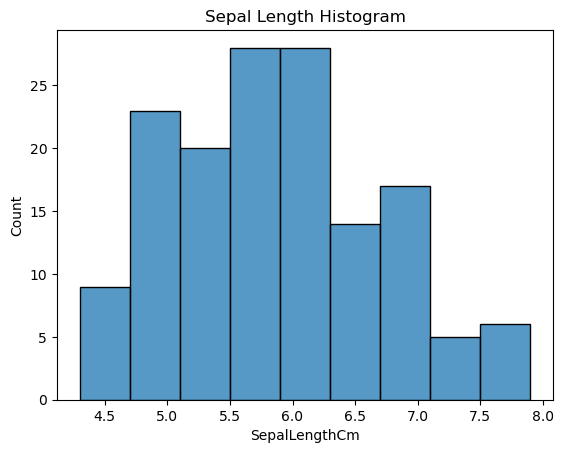

In [18]:
sns.histplot(df['SepalLengthCm'])
plt.title('Sepal Length Histogram')
plt.show()

C:\Users\lalit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


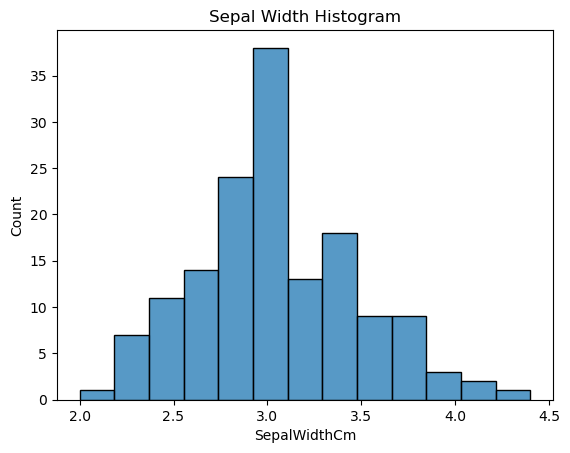

In [19]:
sns.histplot(df['SepalWidthCm'])
plt.title('Sepal Width Histogram')
plt.show()

C:\Users\lalit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

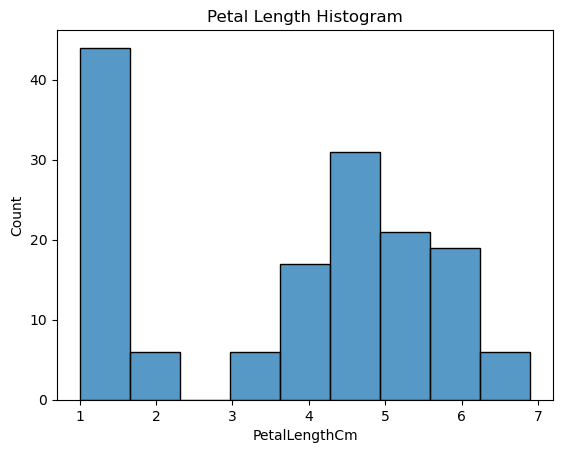

In [20]:
sns.histplot(df['PetalLengthCm'])
plt.title('Petal Length Histogram')
plt.show

C:\Users\lalit\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<function matplotlib.pyplot.show(close=None, block=None)>

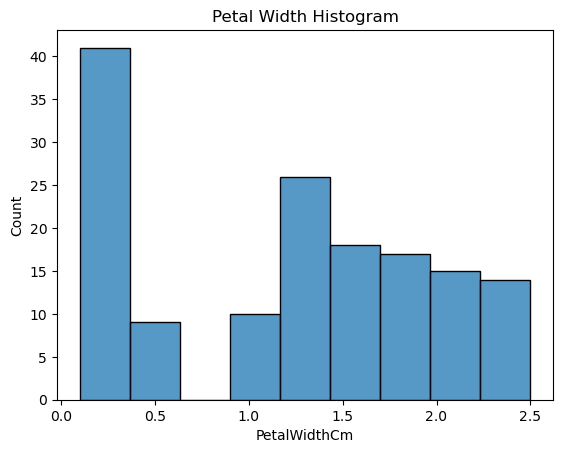

In [21]:
sns.histplot(df['PetalWidthCm'])
plt.title('Petal Width Histogram')
plt.show

In [22]:
# scatterplot
color=['red','Blue','Orange']
species=['Iris-virginica','Iris-versicolor','Irisetosa']

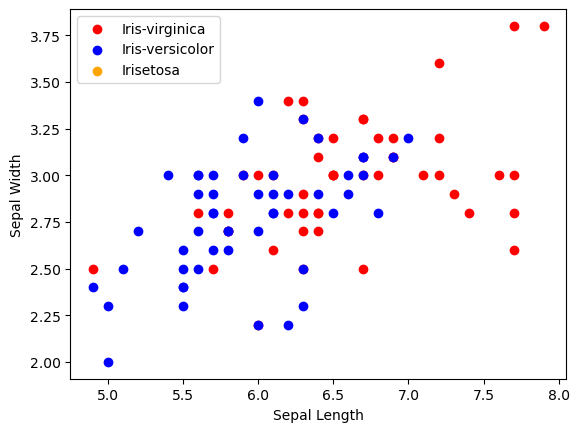

In [23]:
for i in range (3):
    x=df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=color[i],label=species[i])
    
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.legend()

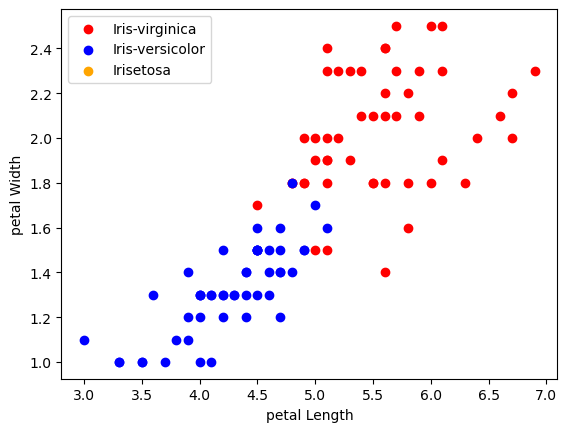

In [24]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = color[i], label = species[i])
    
plt.xlabel("petal Length")
plt.ylabel("petal Width")
plt.legend()

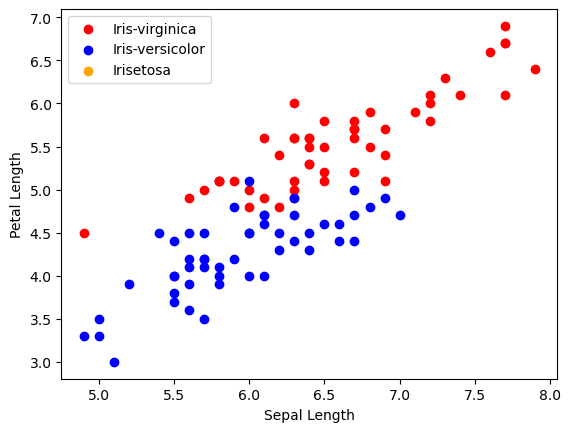

In [25]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = color[i], label = species[i])
    
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

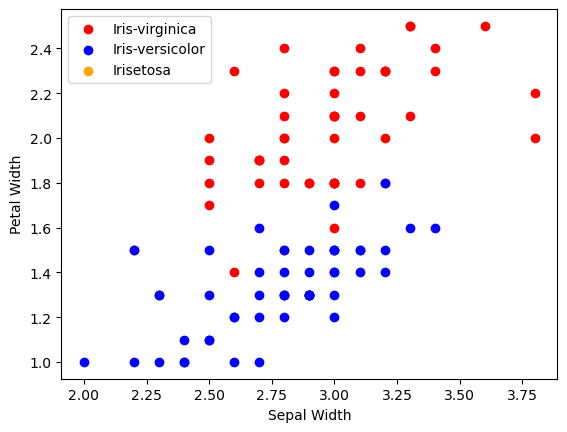

In [26]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = color[i], label = species[i])
    
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

# Correlation Matrix

In [27]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

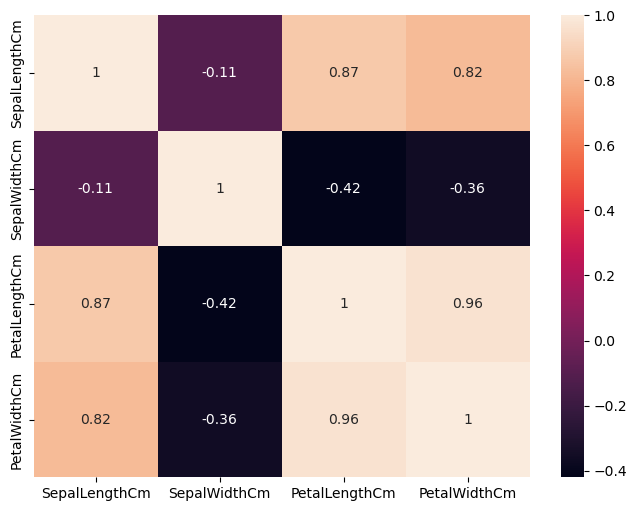

In [28]:
corr = numeric_df.corr()
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(corr, annot = True, ax = ax)

# Label Encoder

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])


In [30]:
# Split data into features and target
X = df.drop(columns=["Species"])
Y = df['Species']


# Model Training

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42, stratify=Y)

In [34]:
#random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print("Classification Report:", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 88.89%
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45

Confusion Matrix: [[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]


In [35]:
#hyper parameter tuned random forest
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],     
    'min_samples_split': [2, 5, 10],          
    'min_samples_leaf': [1, 2, 4],             
    'bootstrap': [True, False]                 
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best parameters: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy with best parameters: 91.11%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.87        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


In [36]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(max_iter=200)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) 

print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 93.33%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


In [37]:
# hyperparameter tuned logistic regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],                    
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],    
    'solver': ['liblinear', 'saga'],                 
    'max_iter': [100, 200, 500],                      
}

log_reg = LogisticRegression()

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_log_reg = grid_search.best_estimator_

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Hyperparameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'none', 'solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


C:\Users\lalit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
225 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lalit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lalit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\lalit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 64, in _check_solver
    raise ValueError(
Val

In [38]:
# knn - K-nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 97.77777777777777
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [39]:
# hyperparameter tuned KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],            
    'weights': ['uniform', 'distance'],     
    'metric': ['euclidean', 'manhattan', 'minkowski'] 
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_knn = grid_search

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [43]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 93.33333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


In [44]:
#hyperparameter tuned decision tree
param_grid = {
    'criterion': ['gini', 'entropy'],         
    'max_depth': [5, 10, 20, None],           
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],           
    'max_features': [None, 'auto', 'sqrt', 'log2']  
}

dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_dt = grid_search.best_estimator_

y_pred = best_dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best parameters: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy with best parameters: 84.44%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.72      0.87      0.79        15
           2       0.83      0.67      0.74        15

    accuracy                           0.84        45
   macro avg       0.85      0.84      0.84        45
weighted avg       0.85      0.84      0.84        45

Confusion Matrix:
[[15  0  0]
 [ 0 13  2]
 [ 0  5 10]]


C:\Users\lalit\anaconda3\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [45]:
#SVM
from sklearn.svm import SVC

model = SVC(kernel='linear', random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]]


In [46]:
#hyperparameter tuned SVM
param_grid = {
    'C': [0.1, 1, 10, 100],                  
    'kernel': ['linear', 'rbf', 'poly'],      
    'gamma': ['scale', 'auto'],               
    'degree': [2, 3, 4],               
}
svc = SVC() 

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)  
grid_search.fit(x_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_svm = grid_search.best_estimator_


y_pred = best_svm.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best parameters: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy with best parameters: 95.56%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
